In [41]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
#Importing data
df = pd.read_csv('NCDEX_data.csv')
#Printing head
df.head()

,Date,Close_Price
0,2-Jan-17,3068
1,3-Jan-17,3042
2,4-Jan-17,3018
3,5-Jan-17,3027
4,6-Jan-17,3028


In [42]:
df['Date']=pd.to_datetime(df['Date'])

In [43]:
df.head()

,Date,Close_Price
0,2017-01-02,3068
1,2017-01-03,3042
2,2017-01-04,3018
3,2017-01-05,3027
4,2017-01-06,3028


In [44]:
train=df[0:676] 
test=df[0:676]

In [45]:
train

,Date,Close_Price
0,2017-01-02,3068
1,2017-01-03,3042
2,2017-01-04,3018
3,2017-01-05,3027
4,2017-01-06,3028
...,...,...
670,2019-12-18,4294
671,2019-12-19,4344
672,2019-12-20,4338
673,2019-12-23,4408


In [46]:
test

,Date,Close_Price
0,2017-01-02,3068
1,2017-01-03,3042
2,2017-01-04,3018
3,2017-01-05,3027
4,2017-01-06,3028
...,...,...
670,2019-12-18,4294
671,2019-12-19,4344
672,2019-12-20,4338
673,2019-12-23,4408


In [47]:
#Aggregating the dataset at daily level
df.Timestamp = pd.to_datetime(df.Date,format='%d-%m-%Y') 
df.index = df.Timestamp 
df = df.resample('D').mean()
train.Timestamp = pd.to_datetime(train.Date,format='%d-%m-%Y') 
train.index = train.Timestamp 
train = train.resample('D').mean() 
test.Timestamp = pd.to_datetime(test.Date,format='%d-%m-%Y') 
test.index = test.Timestamp 
test = test.resample('D').mean()

/home/akash/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
/home/akash/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """
/home/akash/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


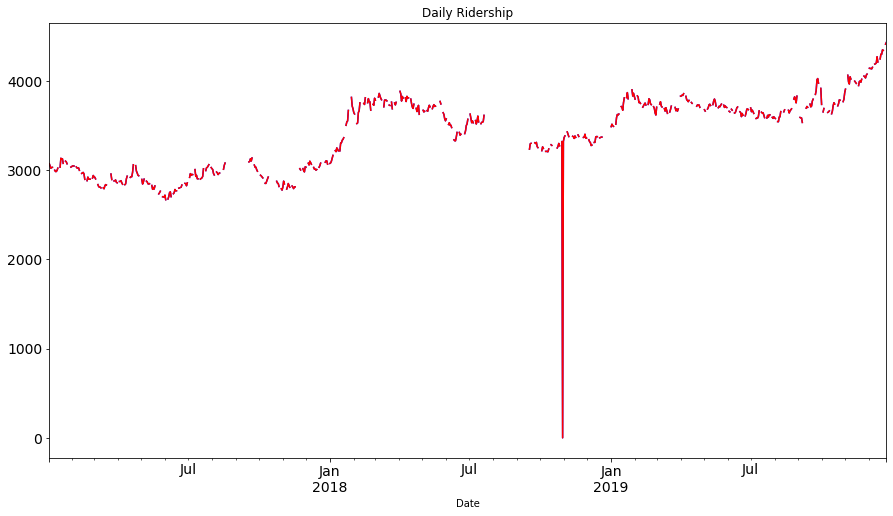

In [49]:
train.Close_Price.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14,color='blue')
test.Close_Price.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14,color='red')
plt.show()

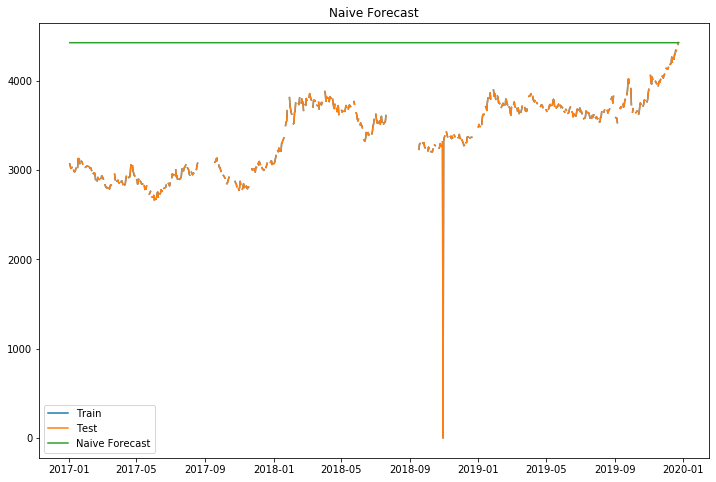

In [50]:
dd= np.asarray(train.Close_Price)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Close_Price'], label='Train')
plt.plot(test.index,test['Close_Price'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()